In [1]:
from classes import DistanceCalculator, CostCalculator, RouteCalculator, EastestCityFinder,CityPreprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
excel_path = r'C:\Users\Dilsan\Desktop\Coding for Data Science and Data Management\Python\Project\worldcities.xlsx'
london_lat = 51.5072
london_lng = -0.1275

city_preprocessor = CityPreprocessor(excel_path, london_lat, london_lng)
preprocessed_data = city_preprocessor.load_and_preprocess_data()


dc = DistanceCalculator()
cc = CostCalculator()
rc = RouteCalculator(preprocessed_data,cc,dc)
ecf = EastestCityFinder()
info_cities = rc.calculate_route()
result = ecf.go_most_east(info_cities)

In [4]:
info_cities

{1826645935: {'city_names': ['East Finchley', 'Kenton', 'Sidcup'],
  'city_ids': [1826180591, 1826411445, 1826363364],
  'city_distances': [9.803167337742982,
   15.399423504650668,
   18.290428507303986],
  'city_latitudes': [51.5902, 51.5878, 51.4263],
  'city_longitudes': [-0.1753, -0.3086, 0.1024],
  'city_pops': [15989.0, 35600.0, 43109.0],
  'city_countries': ['United Kingdom', 'United Kingdom', 'United Kingdom'],
  'city_total_cost': [2, 4, 8]},
 1826180591: {'city_names': ['Kenton', 'London', 'Borehamwood'],
  'city_ids': [1826411445, 1826645935, 1826433403],
  'city_distances': [9.212923268759818, 9.803167337742982, 10.06676089064031],
  'city_latitudes': [51.5878, 51.5072, 51.6578],
  'city_longitudes': [-0.3086, -0.1275, -0.2723],
  'city_pops': [35600.0, 10979000.0, 31955.0],
  'city_countries': ['United Kingdom', 'United Kingdom', 'United Kingdom'],
  'city_total_cost': [2, 6, 8]},
 1826411445: {'city_names': ['Borehamwood', 'East Finchley', 'London'],
  'city_ids': [18264

In [5]:
result

{'United Kingdom_Sidcup': (51.4263, 0.1024),
 'United Kingdom_London': (51.5072, -0.1275),
 'United Kingdom_Northfleet': (51.44, 0.34),
 'United Kingdom_Goffs Oak': (51.7109, -0.0825),
 'United Kingdom_East Finchley': (51.5902, -0.1753),
 'United Kingdom_Kenton': (51.5878, -0.3086),
 'United Kingdom_Strood': (51.393, 0.478),
 'United Kingdom_Stanford le Hope': (51.514, 0.4244),
 'United Kingdom_Borehamwood': (51.6578, -0.2723),
 'United Kingdom_Sawston': (52.1247, 0.1731),
 'United Kingdom_Minster': (51.421, 0.809),
 'United Kingdom_Herne': (51.3492, 1.1331),
 'United Kingdom_Rye': (50.95, 0.73),
 'United Kingdom_Great Cornard': (52.0245, 0.7497),
 'United Kingdom_Great Bookham': (51.278, -0.373),
 'United Kingdom_Hadleigh': (52.044, 0.961),
 'United Kingdom_Eastbourne': (50.77, 0.28),
 'United Kingdom_Leiston': (52.206, 1.579),
 'United Kingdom_Durrington': (51.199, -1.775),
 'United Kingdom_Blunsdon Saint Andrew': (51.61, -1.79),
 'United Kingdom_Petersfield': (51.0038, -0.9345),
 'U

In [9]:
ecf.city_and_country

['United Kingdom_Sidcup',
 'United Kingdom_London',
 'United Kingdom_London',
 'United Kingdom_Northfleet',
 'United Kingdom_Goffs Oak',
 'United Kingdom_East Finchley',
 'United Kingdom_Kenton',
 'United Kingdom_Strood',
 'United Kingdom_London',
 'United Kingdom_Strood',
 'United Kingdom_Strood',
 'United Kingdom_Stanford le Hope',
 'United Kingdom_Borehamwood',
 'United Kingdom_Sawston',
 'United Kingdom_Minster',
 'United Kingdom_Herne',
 'United Kingdom_Rye',
 'United Kingdom_Great Cornard',
 'United Kingdom_Great Bookham',
 'United Kingdom_Great Cornard',
 'United Kingdom_Rye',
 'United Kingdom_Hadleigh',
 'United Kingdom_Eastbourne',
 'United Kingdom_Rye',
 'United Kingdom_Minster',
 'United Kingdom_Leiston',
 'United Kingdom_Durrington',
 'United Kingdom_Blunsdon Saint Andrew',
 'United Kingdom_Petersfield',
 'United Kingdom_Durrington',
 'United Kingdom_Sawston',
 'United Kingdom_Durrington',
 'United Kingdom_Long Eaton',
 'United Kingdom_Lowestoft',
 'United Kingdom_Durringto

In [10]:
(ecf.total_cost)/24

115.0

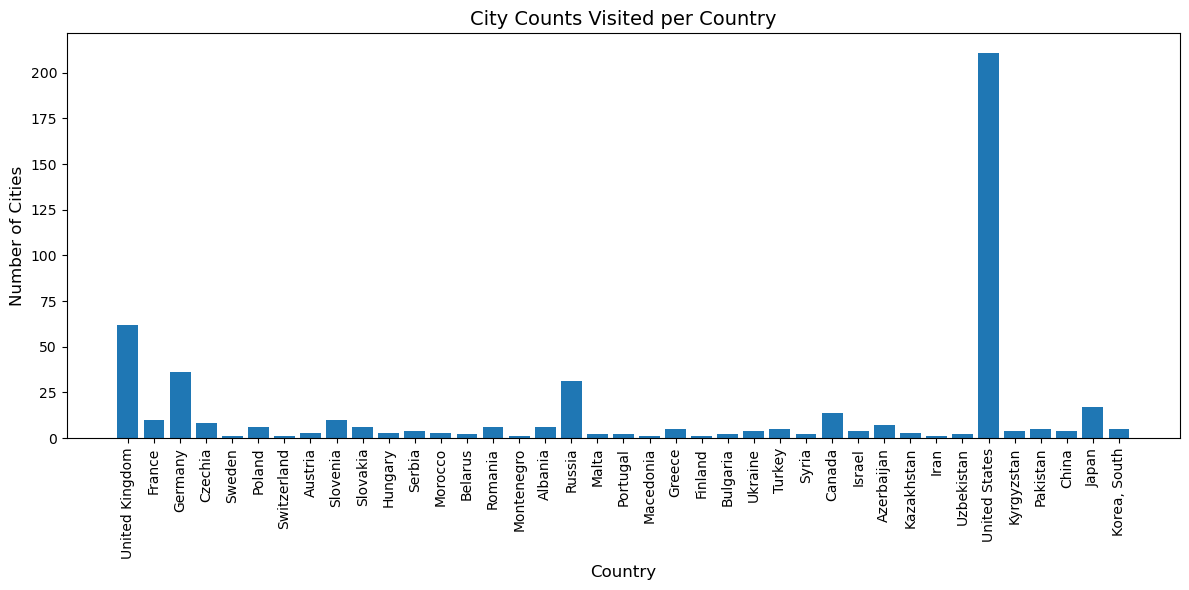

In [13]:
#how many city in each country has been visited
# Split city_and_country to extract countries
# Count occurrences of each country
country_counts = {}

# Count occurrences of each country
for entry in ecf.city_and_country:
    country = entry.split('_')[0]
    country_counts[country] = country_counts.get(country, 0) + 1
    
# Create a bar plot with adjusted size and labels
plt.figure(figsize=(12, 6))  # Adjust the figure size (width, height)

# Create a bar plot
plt.bar(country_counts.keys(), country_counts.values())
plt.xlabel('Country', fontsize=12)  # Adjust the font size
plt.ylabel('Number of Cities', fontsize=12)
plt.title('City Counts Visited per Country', fontsize=14)

# Rotate x-axis labels vertically
plt.xticks(rotation=90, ha='center')  # Rotate labels 90 degrees and center them

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [ ]:
#open dictionary of results: countries_cities, coordinates
import json
with open('result_dict.json', 'w') as json_file:
    json_path = json.dump(result, json_file)